## Example 2: Transmural differences

In this example, we show the three different cell types represented by the Ten Tusscher et al. 2006 model.

The code below relies on a little knowledge about the model file: It assumes that there is a variable called `type` in the component `cell` (or `cell.type` for short), which can be set to 0 to enable an endocardial mode, 1 for epicardial, and 2 for mid-myocardial.

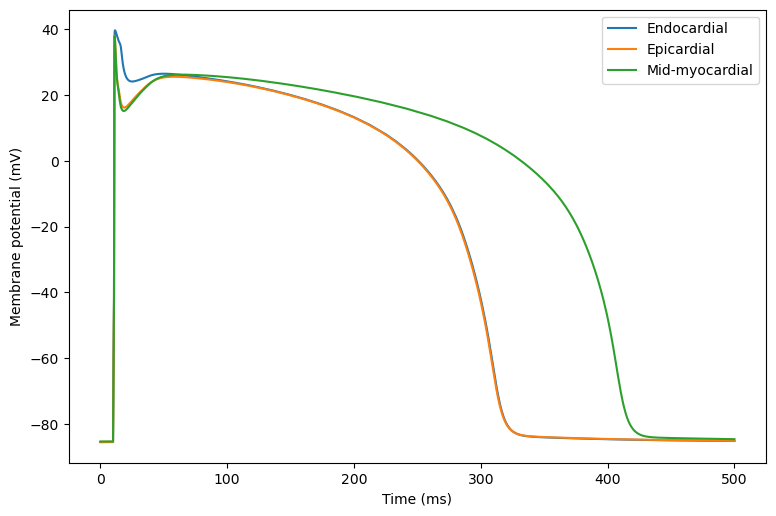

In [1]:
import myokit
import matplotlib.pyplot as plt

# Load a model and protocol
m, p, _ = myokit.load('models/c/tentusscher-2006.mmt')

# Create a simulation
s = myokit.Simulation(m, p)

# Create an empty figure
fig = plt.figure(figsize=(9, 6), dpi=100)
ax = fig.add_subplot()
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Membrane potential (mV)')

# Run a simulation in every mode
modes = {
    0 : 'Endocardial',
    1 : 'Epicardial',
    2 : 'Mid-myocardial',
}

for index, name in modes.items():

    # Change the model's cell type variable, within the simulation
    s.set_constant('cell.type', index)

    # Pre-pace for a few beats
    s.pre(50 * 1000)

    # Run a logged simulation
    d = s.run(500)

    # Store to disk for post-processing (optional)
    d.save_csv(f'ttp-2006-{name}.csv')

    # Display the simulated membrane potential
    ax.plot(d['engine.time'], d['membrane.V'], label=name)

    # Reset the simulation
    s.reset()

ax.legend(loc='upper right')
plt.show()